In [1]:
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np

from contagion.utils import get_rho_MF, parse_results
from directories import contagion_results_dir

%matplotlib inline


## Plotting

### Simplagion Contagion Model of order 2

In [2]:
dataset = 'contact-high-school'
lambda_deltas = [2.5, 2.5, 0.8, 0]
# initial conditions (rate of infected)
initial_infected_rates = [.4, .01, .01, .01]
mu = 0.05

/mnt/data/Telematica/SimplicialNetworkScience/python/contagion/utils.py:71: RuntimeWarning: invalid value encountered in double_scalars
  rho1 = (lD-l + np.sqrt(in_sqrt))/(2*lD)


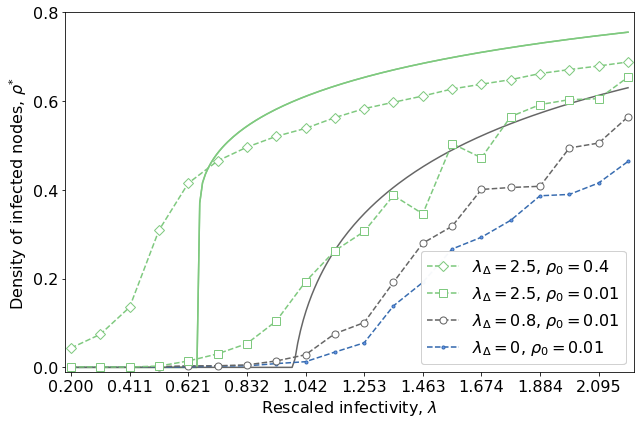

In [3]:
fig = plt.figure(figsize=(9, 6))
# plt.rcParams['xtick.major.width'] = 1.2
# plt.rcParams['ytick.major.width'] = 1.2
# plt.rcParams['axes.linewidth'] = 1.2

markers = ['D', 's', 'o', '.']
zorders = [8, 7, 6, 5]
mfcs = ['white', 'white', 'white', 'cornflowerblue']
markersizes = [7.5, 7.5, 7, 6]
colormap = plt.cm.get_cmap('Accent')
colors_list = list(colormap(np.linspace(0, 1, len(set(lambda_deltas)))))
colors_dict = {}
for lambda_delta in set(lambda_deltas):
    colors_dict[lambda_delta] = colors_list.pop()

ax = plt.subplot(111)

# Preparing MF
MF_x = np.linspace(0.2, 2.2, 200)

MF_y_dict = {}

for lambda_delta in set(lambda_deltas):
    MF_y = list(map(lambda xx: get_rho_MF(xx, lambda_delta), MF_x))
    MF_y_dict[lambda_delta] = MF_y


lambdas = []
for i, (lambda_delta, initial_infected_rate) in enumerate(zip(lambda_deltas, initial_infected_rates)):
    filename = f'{dataset}_mu{mu}_lambdaD{lambda_delta}_infectedRate{initial_infected_rate}.p'
    results = pickle.load(
        open(os.path.join(contagion_results_dir, filename), "rb"))

    avg_stationary_rhos, k, k_delta, avg_rhos, lambdas, mu = parse_results(
        results)
    
    label = f'$\\lambda_\\Delta={lambda_delta}$, $\\rho_0={initial_infected_rate}$'
    ax.plot(lambdas, avg_stationary_rhos, markers[i], color=colors_dict[lambda_delta], zorder=zorders[i], ls='dashed',
            mfc=mfcs[i], markersize=markersizes[i], label=label)

    if (lambda_delta != 0):  # MF has no sense for lambda_delta=0
        ax.plot(MF_x, MF_y_dict[lambda_delta], '-',
                markersize=2, color=colors_dict[lambda_delta], lw=1.5)

ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlabel(r'Rescaled infectivity, $\lambda$', size=16)
ax.set_ylabel(r'Density of infected nodes, $\rho^{*}$', size=16)
ax.set_xlim(lambdas[0] - .02, lambdas[-1] + .02)
# Print every two lambdas in the x-axis
ax.set_xticks([lambda1 for i, lambda1 in enumerate(lambdas) if i % 2 == 0])
ax.set_ylim(-0.01, 0.8)
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8])

lgd = ax.legend(loc='best', fontsize=16)
ax.add_artist(lgd)

# ax.annotate('SIS', (2, 0.38), fontsize=13)

plt.tight_layout()


### Rho over time

In [8]:
dataset = 'contact-high-school'
lambda_delta = 2.5
lambda1 = .75
# initial conditions (rate of infected)
initial_infected_rates = [.01, .4]
mu = 0.05

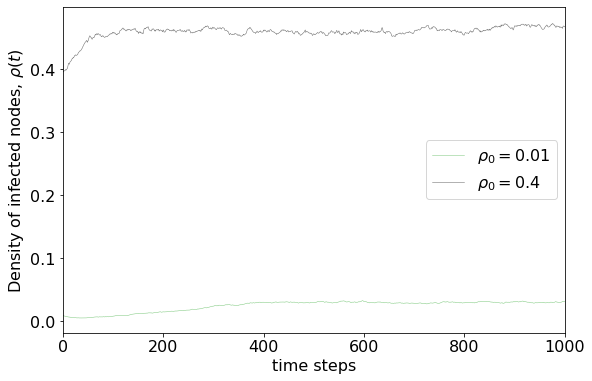

In [15]:
fig = plt.figure(figsize=(9, 6))
colors = list(colormap(np.linspace(0, 1, len(set(initial_infected_rates)))))
ax = plt.subplot(111)

for i, rho_0 in enumerate(initial_infected_rates):
    filename = f'{dataset}_mu{mu}_lambdaD{lambda_delta}_infectedRate{rho_0}.p'
    results = pickle.load(
        open(os.path.join(contagion_results_dir, filename), "rb"))
    avg_stationary_rhos, k, k_delta, avg_rhos, lambdas, mu = parse_results(results)
    
    # I take the lambda in the simultaion
    takeClosest = lambda num,collection:min(collection,key=lambda x:abs(x-num))
    closest_lambda1 = float(takeClosest(lambda1, lambdas))
    closest_lambda1_index = lambdas.index(closest_lambda1)
    
    x_axis = [timestep for timestep in range(len(avg_rhos[closest_lambda1_index]))]
    label = f'$\\rho_0={rho_0}$'
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.set_xlabel(r'time steps', size=16)
    ax.set_ylabel(r'Density of infected nodes, $\rho(t)$', size=16)
    ax.plot(x_axis, avg_rhos[closest_lambda1_index], color=colors[i], ls='-', lw=.5, label=label)
    ax.set_xlim(0, 1000)
    ax.legend(loc='best', fontsize=16)
